In [ ]:
#Description:
#   Analysis of 2017 Census data by age and state including employment rates and income.
#   Census data sourced from https://factfinder.census.gov
#   Also bringing in FBI Crime Data by age and sex via csv files (SES_FBI_Crime_Data_STATE_VICTIM_DATA_for_Census_Econ_Analysis .ipynb)
#
#Definitions:
#   https://www.census.gov/programs-surveys/acs/technical-documentation/code-lists.html
#   Workers include members of the Armed Forces and civilians who were at work last week.
#   The employment status data shown in ACS tabulations relate to people 16 years old and over (unless otherwise specified)
#  
#
#Modification History:
#   DD-MMM-YYY  Author          Description
#   13-07-2019  Stacey Smith    INITIAL CREATION
#   

In [12]:
# Dependencies and Setup

%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv

from pprint import pprint

In [13]:
#IMPORT CENSUS DATA
# Used https://factfinder.census.gov to build a table of the data I wanted.  
# Exported that data from the website into a csv file

#Open the Census Economic data CSV file
path_econ = "Resources/ACS_17_5YR_DP03_with_ann.csv"
econ_df = pd.read_csv(path_econ, encoding="ISO-8859-1")

econ_df.head()

,Id2,Geography,Estimate; EMPLOYMENT STATUS - Population 16 years and over,Percent; EMPLOYMENT STATUS - Population 16 years and over,Estimate; EMPLOYMENT STATUS - Population 16 years and over - Not in labor force,Percent; EMPLOYMENT STATUS - Population 16 years and over - Not in labor force,Estimate; EMPLOYMENT STATUS - Civilian labor force,Percent; EMPLOYMENT STATUS - Civilian labor force,Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate,Estimate; EMPLOYMENT STATUS - Females 16 years and over,...,Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - Under 18 years - Related children of the householder under 18 years,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - Under 18 years - Related children of the householder under 18 years,Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - Under 18 years - Related children of the householder under 18 years - Related children of the householder 5 to 17 years,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - Under 18 years - Related children of the householder under 18 years - Related children of the householder 5 to 17 years,Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - 18 years and over,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - 18 years and over,Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - 18 years and over - 18 to 64 years,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - 18 years and over - 18 to 64 years,Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - 18 years and over - 65 years and over,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - 18 years and over - 65 years and over
0,NaN,United States,255797692,255797692,93613367,36.6,161159470,161159470,6.6,131092196,...,(X),20.0,(X),19.0,(X),12.9,(X),13.7,(X),9.3
1,1.0,Alabama,3876136,3876136,1642927,42.4,2220900,2220900,7.4,2022516,...,(X),25.8,(X),24.3,(X),15.6,(X),16.9,(X),10.4
2,2.0,Alaska,571453,571453,170831,29.9,383593,383593,7.7,271063,...,(X),13.7,(X),13.2,(X),8.9,(X),9.4,(X),5.1
3,4.0,Arizona,5371341,5371341,2174225,40.5,3179802,3179802,7.1,2718818,...,(X),23.7,(X),22.6,(X),14.7,(X),16.3,(X),9.0
4,5.0,Arkansas,2351061,2351061,984959,41.9,1361664,1361664,6.3,1209967,...,(X),25.3,(X),23.8,(X),15.8,(X),17.2,(X),10.4


In [14]:
#CLEAN AND ORGANIZE THE DATA
# For the purposes of this analysis, I only want to use a small portion of the data I downloaded from the census website. 
 
# Delete unwanted data 
del econ_df['Id2']
del econ_df['Estimate; EMPLOYMENT STATUS - Civilian labor force']
del econ_df['Percent; EMPLOYMENT STATUS - Civilian labor force']
del econ_df['Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate']
del econ_df['Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - Under 18 years - Related children of the householder under 18 years'] 
del econ_df['Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - Under 18 years - Related children of the householder under 18 years']
del econ_df['Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - Under 18 years - Related children of the householder under 18 years - Related children of the householder 5 to 17 years']
del econ_df['Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - Under 18 years - Related children of the householder under 18 years - Related children of the householder 5 to 17 years']
del econ_df['Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - 18 years and over - 18 to 64 years']
del econ_df['Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - 18 years and over - 18 to 64 years']
del econ_df['Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - 18 years and over - 65 years and over']
del econ_df['Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - 18 years and over - 65 years and over']
del econ_df['Estimate; EMPLOYMENT STATUS - Females 16 years and over - In labor force'],
del econ_df['Percent; EMPLOYMENT STATUS - Females 16 years and over - In labor force'],
del econ_df['Estimate; EMPLOYMENT STATUS - Females 16 years and over - In labor force - Civilian labor force'],
del econ_df['Percent; EMPLOYMENT STATUS - Females 16 years and over - In labor force - Civilian labor force'],
del econ_df['Estimate; EMPLOYMENT STATUS - Females 16 years and over - In labor force - Civilian labor force - Employed'],
del econ_df['Percent; EMPLOYMENT STATUS - Females 16 years and over - In labor force - Civilian labor force - Employed'],
del econ_df['Estimate; COMMUTING TO WORK - Workers 16 years and over'],
del econ_df['Percent; COMMUTING TO WORK - Workers 16 years and over'],
del econ_df['Estimate; COMMUTING TO WORK - Workers 16 years and over - Car, truck, or van -- drove alone'],
del econ_df['Percent; COMMUTING TO WORK - Workers 16 years and over - Car, truck, or van -- drove alone'],
del econ_df['Estimate; COMMUTING TO WORK - Workers 16 years and over - Car, truck, or van -- carpooled'],
del econ_df['Percent; COMMUTING TO WORK - Workers 16 years and over - Car, truck, or van -- carpooled'],
del econ_df['Estimate; COMMUTING TO WORK - Workers 16 years and over - Public transportation (excluding taxicab)'],
del econ_df['Percent; COMMUTING TO WORK - Workers 16 years and over - Public transportation (excluding taxicab)'],
del econ_df['Estimate; COMMUTING TO WORK - Workers 16 years and over - Walked'],
del econ_df['Percent; COMMUTING TO WORK - Workers 16 years and over - Walked'],
del econ_df['Estimate; COMMUTING TO WORK - Workers 16 years and over - Other means'],
del econ_df['Percent; COMMUTING TO WORK - Workers 16 years and over - Other means'],
del econ_df['Estimate; COMMUTING TO WORK - Workers 16 years and over - Worked at home'],
del econ_df['Percent; COMMUTING TO WORK - Workers 16 years and over - Worked at home'],
del econ_df['Estimate; COMMUTING TO WORK - Mean travel time to work (minutes)'],
del econ_df['Estimate; OCCUPATION - Civilian employed population 16 years and over'],
del econ_df['Percent; OCCUPATION - Civilian employed population 16 years and over'],
del econ_df['Estimate; OCCUPATION - Civilian employed population 16 years and over - Management, business, science, and arts occupations'],
del econ_df['Percent; OCCUPATION - Civilian employed population 16 years and over - Management, business, science, and arts occupations'],
del econ_df['Estimate; OCCUPATION - Civilian employed population 16 years and over - Service occupations'],
del econ_df['Percent; OCCUPATION - Civilian employed population 16 years and over - Service occupations'],
del econ_df['Estimate; OCCUPATION - Civilian employed population 16 years and over - Sales and office occupations'],
del econ_df['Percent; OCCUPATION - Civilian employed population 16 years and over - Sales and office occupations'],
del econ_df['Estimate; OCCUPATION - Civilian employed population 16 years and over - Natural resources, construction, and maintenance occupations'],
del econ_df['Percent; OCCUPATION - Civilian employed population 16 years and over - Natural resources, construction, and maintenance occupations'],
del econ_df['Estimate; OCCUPATION - Civilian employed population 16 years and over - Production, transportation, and material moving occupations'],
del econ_df['Percent; OCCUPATION - Civilian employed population 16 years and over - Production, transportation, and material moving occupations'],
del econ_df['Estimate; CLASS OF WORKER - Civilian employed population 16 years and over'],
del econ_df['Percent; CLASS OF WORKER - Civilian employed population 16 years and over'],
del econ_df['Estimate; CLASS OF WORKER - Civilian employed population 16 years and over - Private wage and salary workers'],
del econ_df['Percent; CLASS OF WORKER - Civilian employed population 16 years and over - Private wage and salary workers'],
del econ_df['Estimate; CLASS OF WORKER - Civilian employed population 16 years and over - Government workers'],
del econ_df['Percent; CLASS OF WORKER - Civilian employed population 16 years and over - Government workers'],
del econ_df['Estimate; CLASS OF WORKER - Civilian employed population 16 years and over - Self-employed in own not incorporated business workers'],
del econ_df['Percent; CLASS OF WORKER - Civilian employed population 16 years and over - Self-employed in own not incorporated business workers'],
del econ_df['Estimate; CLASS OF WORKER - Civilian employed population 16 years and over - Unpaid family workers'],
del econ_df['Percent; CLASS OF WORKER - Civilian employed population 16 years and over - Unpaid family workers'],
del econ_df['Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households'],
del econ_df['Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Less than $10,000'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Less than $10,000'],
del econ_df['Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $10,000 to $14,999'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $10,000 to $14,999'],
del econ_df['Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $15,000 to $24,999'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $15,000 to $24,999'],
del econ_df['Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $25,000 to $34,999'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $25,000 to $34,999'],
del econ_df['Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $35,000 to $49,999'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $35,000 to $49,999'],
del econ_df['Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $50,000 to $74,999'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $50,000 to $74,999'],
del econ_df['Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $75,000 to $99,999'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $75,000 to $99,999'],
del econ_df['Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $100,000 to $149,999'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $100,000 to $149,999'],
del econ_df['Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $150,000 to $199,999'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $150,000 to $199,999'],
del econ_df['Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $200,000 or more'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $200,000 or more'],
del econ_df['Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population'],
del econ_df['Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population'],
del econ_df['Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - With health insurance coverage'],
del econ_df['Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - With health insurance coverage'],
del econ_df['Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - With health insurance coverage - With private health insurance'],
del econ_df['Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - With health insurance coverage - With private health insurance'],
del econ_df['Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - With health insurance coverage - With public coverage'],
del econ_df['Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - With health insurance coverage - With public coverage'],
del econ_df['Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage'],
del econ_df['Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage'],
del econ_df['Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people'],
del econ_df['Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people'],
del econ_df['Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - Under 18 years'],
del econ_df['Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - Under 18 years'],
del econ_df['Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - 18 years and over'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Median earnings for workers (dollars)'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Median earnings for male full-time, year-round workers (dollars)'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Median household income (dollars)'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Median earnings for female full-time, year-round workers (dollars)'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)'],
del econ_df['Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)']

In [15]:
#CLEAN AND ORGANIZE THE DATA
# Original column names are ridiculous.  Shortening them to something more manageable.
# Also need to make sure the 'Geography' column is renamed to 'state_name' so I can merge with my state data later on.

# Rename columns
o_econ_df = econ_df.rename(index=str, columns={
    
    'Geography': "state_name", 
    'Estimate; EMPLOYMENT STATUS - Population 16 years and over': "Emp_pop_all",
    'Percent; EMPLOYMENT STATUS - Population 16 years and over': "Pct_Emp_pop_all",
    'Estimate; EMPLOYMENT STATUS - Population 16 years and over - Not in labor force': "UnEmp_pop_all",
    'Percent; EMPLOYMENT STATUS - Population 16 years and over - Not in labor force': "Pct_UnEmp_pop_all",
    'Estimate; EMPLOYMENT STATUS - Females 16 years and over': "Emp_pop_Female",
    'Percent; EMPLOYMENT STATUS - Females 16 years and over': "Pct_Emp_pop_Female",
    'Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people - 18 years and over': "Pct_Pov_pop_all18",
    'Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Median household income (dollars)': "Total_median_income",
    'Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)': "Total_mean_income",
    'Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)': "Per_capita_income",
    'Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Median earnings for workers (dollars)': "Median_earnings",
    'Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Median earnings for male full-time, year-round workers (dollars)': "Median_male",
    'Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Median earnings for female full-time, year-round workers (dollars)': "Median_female"

   
})

o_econ_df.columns

Index(['state_name', 'Emp_pop_all', 'Pct_Emp_pop_all', 'UnEmp_pop_all',
       'Pct_UnEmp_pop_all', 'Emp_pop_Female', 'Pct_Emp_pop_Female',
       'Total_median_income', 'Total_mean_income', 'Per_capita_income',
       'Median_earnings', 'Median_male', 'Median_female', 'Pct_Pov_pop_all18'],
      dtype='object')

In [16]:
# Checking to make sure I can work with the data types as they are now.  
o_econ_df.dtypes

state_name              object
Emp_pop_all              int64
Pct_Emp_pop_all          int64
UnEmp_pop_all            int64
Pct_UnEmp_pop_all      float64
Emp_pop_Female           int64
Pct_Emp_pop_Female       int64
Total_median_income      int64
Total_mean_income        int64
Per_capita_income        int64
Median_earnings          int64
Median_male              int64
Median_female            int64
Pct_Pov_pop_all18      float64
dtype: object

In [17]:
#BRING IN STATE DATA

# Open the State Data CSV file
path_state = "output_data/state_data.csv"
state_df = pd.read_csv(path_state, encoding="ISO-8859-1")
state_df.head()

,Unnamed: 0,region_code,state_abbr,state_fips_code,state_id,state_name
0,0,4,AK,2.0,1,Alaska
1,1,3,AL,1.0,2,Alabama
2,2,3,AR,5.0,3,Arkansas
3,3,99,AS,60.0,4,American Samoa
4,4,4,AZ,4.0,5,Arizona


In [18]:
# Merge the state data and my econ data on the state_name.  This allows me to bring the state_abbr column into the df, which I will need later on. 
o_econ_df_s = pd.merge(o_econ_df, state_df, on="state_name")
o_econ_df_s.head()

,state_name,Emp_pop_all,Pct_Emp_pop_all,UnEmp_pop_all,Pct_UnEmp_pop_all,Emp_pop_Female,Pct_Emp_pop_Female,Total_median_income,Total_mean_income,Per_capita_income,Median_earnings,Median_male,Median_female,Pct_Pov_pop_all18,Unnamed: 0,region_code,state_abbr,state_fips_code,state_id
0,Alabama,3876136,3876136,1642927,42.4,2022516,2022516,46472,64476,25746,29288,46602,35060,15.6,1,3,AL,1.0,2
1,Alaska,571453,571453,170831,29.9,271063,271063,76114,94469,35065,37369,58955,47160,8.9,0,4,AK,2.0,1
2,Arizona,5371341,5371341,2174225,40.5,2718818,2718818,53510,73735,27964,30811,46294,38810,14.7,4,4,AZ,4.0,5
3,Arkansas,2351061,2351061,984959,41.9,1209967,1209967,43813,61330,24426,27923,41576,32813,15.8,2,3,AR,5.0,3
4,California,30910058,30910058,11297281,36.5,15665864,15665864,67169,96104,33128,32738,52054,45568,13.4,5,4,CA,6.0,6


<IPython.core.display.Javascript object>


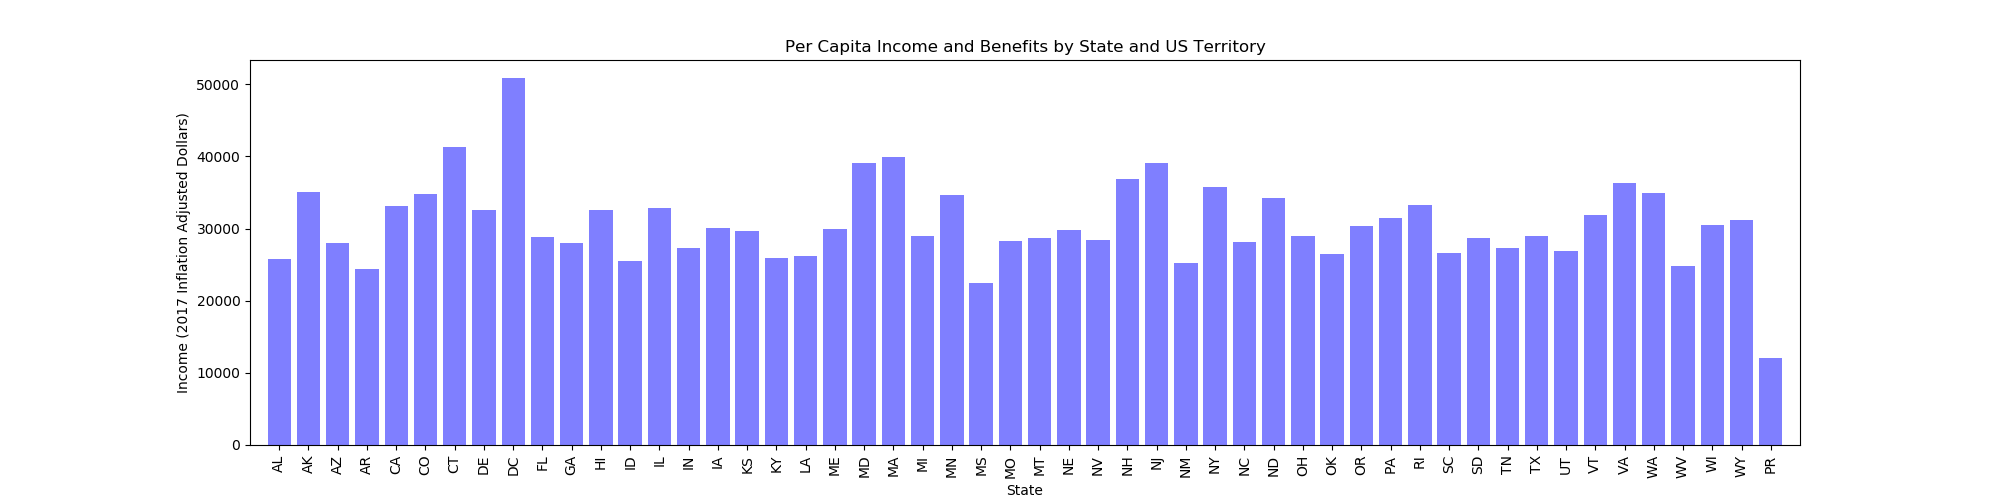

In [19]:
#PER CAPITA INCOME BY STATE FOR 2017

states = o_econ_df_s['state_abbr']
per_capita = o_econ_df_s['Per_capita_income']
x_axis = np.arange(len(states))

plt.figure(figsize=(20, 5))
plt.bar(x_axis, per_capita, color='b', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="vertical")

plt.xlim(-1, len(x_axis))
#plt.ylim(0, max(per_capita)+5000)

plt.title("Per Capita Income and Benefits by State and US Territory")
plt.xlabel("State")
plt.ylabel("Income (2017 Inflation Adjusted Dollars)")

plt.savefig("Images/State_PerCapita_Income_2017.png")

<IPython.core.display.Javascript object>


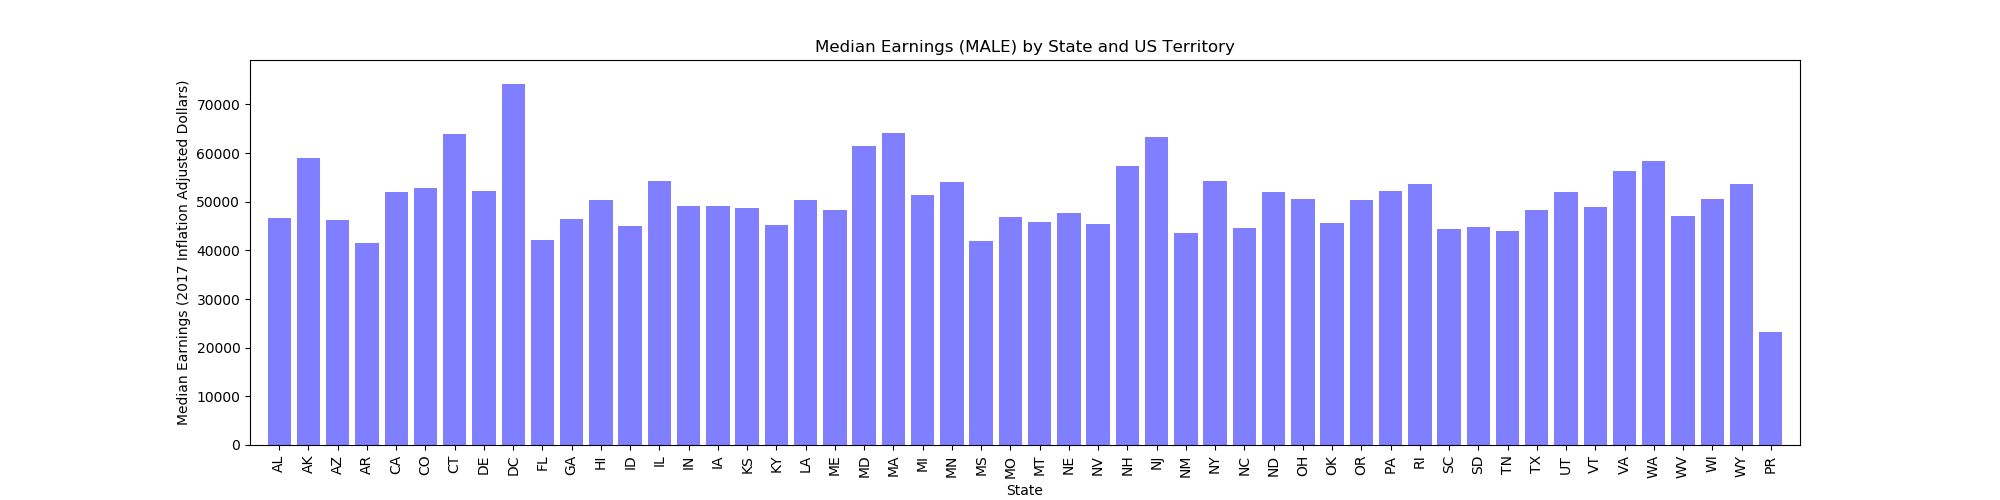

In [20]:
#MEDIAN EARNINGS (MALE) BY STATE FOR 2017

states = o_econ_df_s['state_abbr']
med_earn = o_econ_df_s['Median_male']
x_axis = np.arange(len(states))

plt.figure(figsize=(20, 5))
plt.bar(x_axis, med_earn, color='b', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="vertical")

plt.xlim(-1, len(x_axis))
plt.ylim(0, max(med_earn)+5000)

plt.title("Median Earnings (MALE) by State and US Territory")
plt.xlabel("State")
plt.ylabel("Median Earnings (2017 Inflation Adjusted Dollars)")

plt.savefig("Images/Male_State_Median_Earnings_2017.png")

In [ ]:
#MEDIAN EARNINGS (FEMALE) BY STATE FOR 2017

states = o_econ_df_s['state_abbr']
med_earn = o_econ_df_s['Median_female']
x_axis = np.arange(len(states))

plt.figure(figsize=(20, 5))
plt.bar(x_axis, med_earn, color='b', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="vertical")

plt.xlim(-1, len(x_axis))
plt.ylim(0, max(med_earn)+5000)

plt.title("Median Earnings (FEMALE) by State and US Territory")
plt.xlabel("State")
plt.ylabel("Median Earnings (2017 Inflation Adjusted Dollars)")

plt.savefig("Images/Female_State_Median_Earnings_2017.png")

<IPython.core.display.Javascript object>


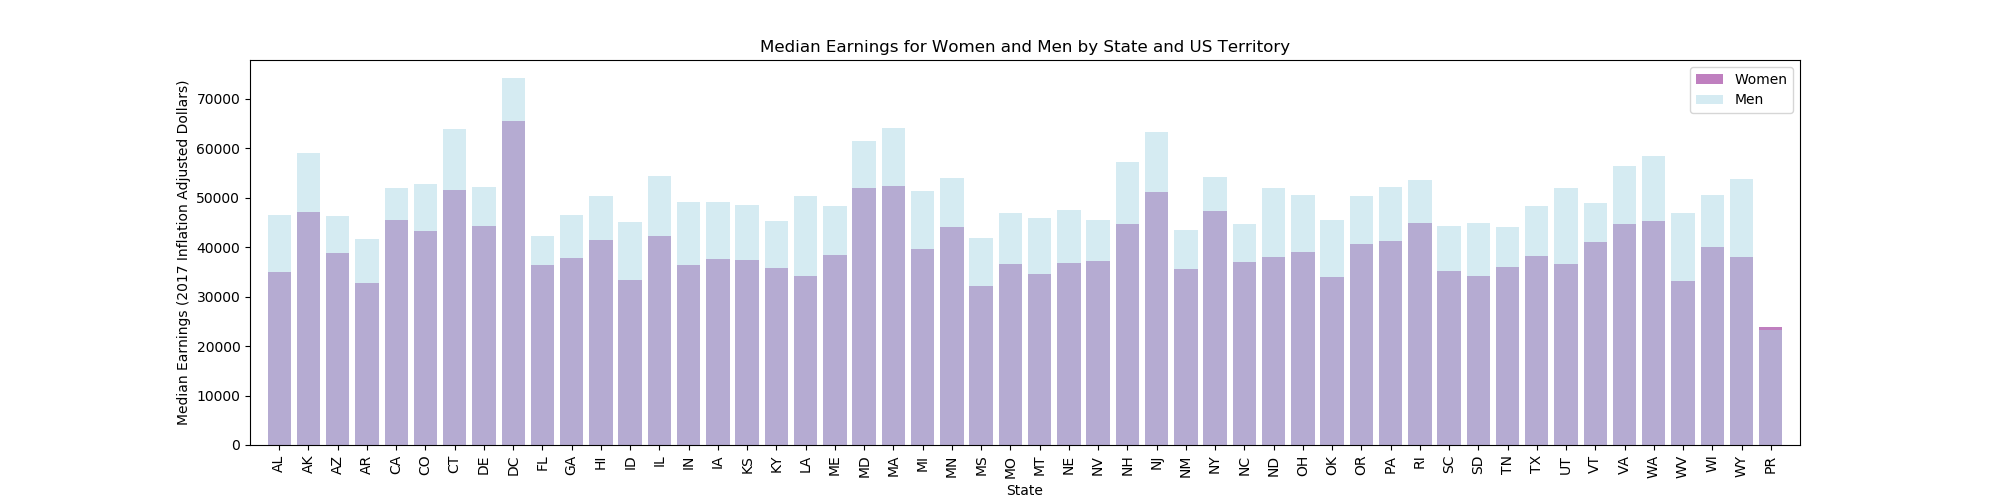

In [21]:
#MEDIAN EARNINGS (MALE & FEMALE SIDE-BY-SIDE) BY STATE FOR 2017

states = o_econ_df_s['state_abbr']
med_earn_F = o_econ_df_s['Median_female']
med_earn_M = o_econ_df_s['Median_male']
x_axis = np.arange(len(states))

plt.figure(figsize=(20, 5))
women = plt.bar(x_axis, med_earn_F, color='purple', alpha=0.5, align='center')
men = plt.bar(x_axis, med_earn_M, color='lightblue', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="vertical")

plt.xlim(-1, len(x_axis))
#plt.ylim(0, max(med_earn_M)+5000)

plt.title("Median Earnings for Women and Men by State and US Territory")
plt.xlabel("State")
plt.ylabel("Median Earnings (2017 Inflation Adjusted Dollars)")

plt.legend((women[0], men[0]), ('Women', 'Men'))

plt.savefig("Images/Male_and_Female_State_Median_Earnings_2017.png")

In [ ]:
#Open the FBI Crime Data by age and state - CSV file
path_age = "output_data/ageDF.csv"
age_df = pd.read_csv(path_age, encoding="ISO-8859-1")

age_df.head()

In [22]:
#The only year we care about for this particular analysis is 2017.  
#Cleaning up the age_df to remove all years except for 2017.  

age_df_2017 = age_df.loc[age_df['Year']==2017, :]
age_df_2017.head()

NameError: name 'age_df' is not defined

In [23]:
#Next, I need to deal with the age ranges.  
#My economic data looks at people 16+ and 18+.  There is no defined upper age limit for the data included in my dataset. 
#The FBI data deals in ranges that do not easily translate to my census data.  Specifically, the 10-19 range.
#I only want 16, 17, 18, and 19.  
#To pull these from the 10-19 range, I will take the total for that range and divide it by 10.
#This will give me an average value for each age in the range.  
#I will use the average as an estimated value for 16, 17, 18, and 19.

#Don't care about 0-9 range
del age_df_2017['0-9']

#Add a new column to the df that calculates the average for each age between 10-19
age_df_2017['16-19'] = age_df_2017['10-19']/10

#Add more new columns to hold the values for all ranges 16+ and 18+ 
age_df_2017['16_plus'] = age_df_2017['20-29'] + age_df_2017['30-39']+ age_df_2017['40-49'] + age_df_2017['50-59'] + age_df_2017['60-69'] + age_df_2017['70-79'] + age_df_2017['80-89'] + age_df_2017['90-99'] + (age_df_2017['16-19']*4)
age_df_2017['18_plus'] = age_df_2017['20-29'] + age_df_2017['30-39']+ age_df_2017['40-49'] + age_df_2017['50-59'] + age_df_2017['60-69'] + age_df_2017['70-79'] + age_df_2017['80-89'] + age_df_2017['90-99'] + (age_df_2017['16-19']*2)

NameError: name 'age_df_2017' is not defined

In [24]:
age_df_2017.sort_values(by=['16_plus'], ascending=False)

NameError: name 'age_df_2017' is not defined

In [25]:
states = age_df_2017['State']
homicides = age_df_2017['16_plus'].astype(int)
x_axis = np.arange(len(states))

plt.figure(figsize=(20, 5))
plt.bar(x_axis, homicides, color='b', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="vertical")

plt.xlim(-1, len(x_axis))

plt.title("Homicides per State (2017)")
plt.xlabel("State")
plt.ylabel("Number of Homicides")

plt.savefig("Images/Homicides_by_State.png")

NameError: name 'age_df_2017' is not defined

In [26]:
path_sex = "output_data/sexDF.csv"
sex_df = pd.read_csv(path_sex, encoding="ISO-8859-1")

sex_df_2017 = sex_df.loc[sex_df['Year']==2017, :]

del sex_df_2017['Unknown']
del sex_df_2017["Unkown"]

sex_df_2017.head()

,Unnamed: 0,State,Year,Female Count,Male Count
11,11,AL,2017,0,2
28,28,AR,2017,73,176
41,41,AZ,2017,10,15
63,63,CO,2017,56,162
83,83,CT,2017,12,32


<IPython.core.display.Javascript object>


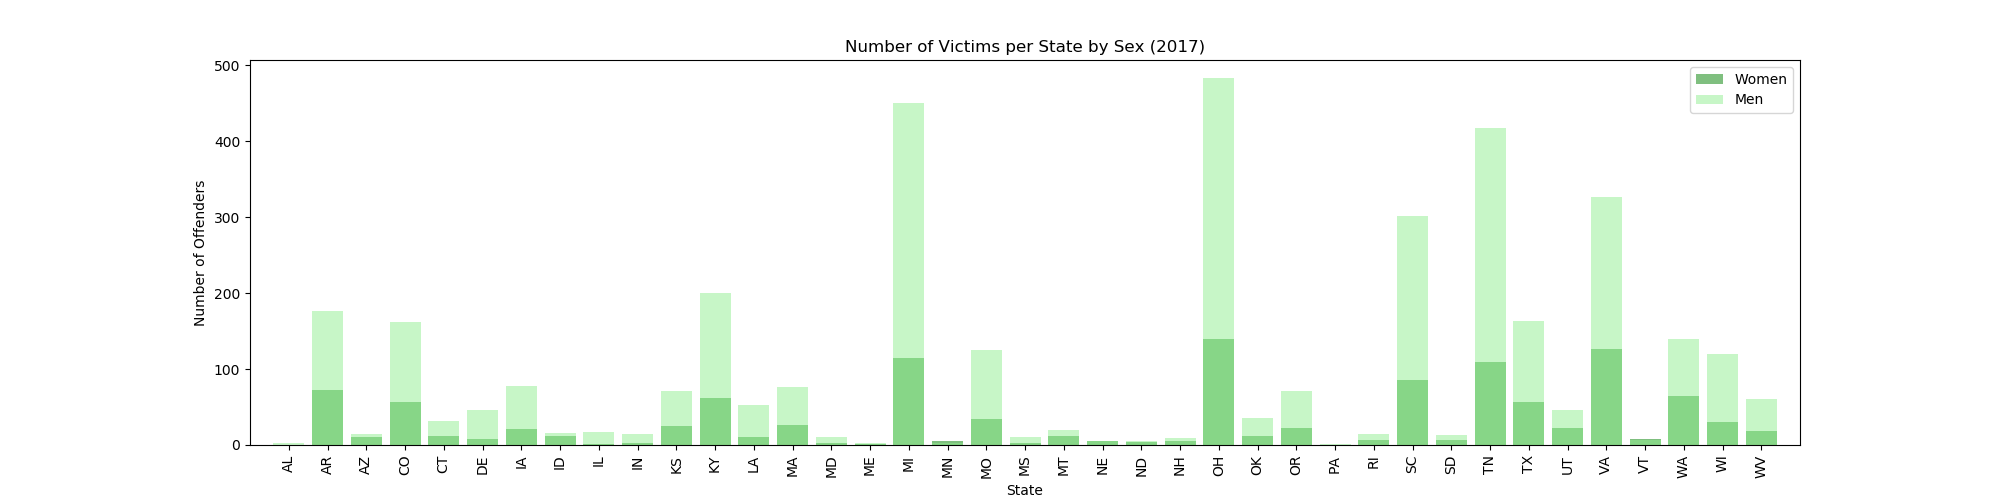

In [27]:
#VICTIMS BY STATE PER SEX

states = sex_df_2017['State']
v_F = sex_df_2017['Female Count']
v_M = sex_df_2017['Male Count']
x_axis = np.arange(len(states))

plt.figure(figsize=(20, 5))
women = plt.bar(x_axis, v_F, color='green', alpha=0.5, align='center')
men = plt.bar(x_axis, v_M, color='lightgreen', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="vertical")

plt.xlim(-1, len(x_axis))
#plt.ylim(0, max(med_earn_M)+5000)

plt.title("Number of Victims per State by Sex (2017)")
plt.xlabel("State")
plt.ylabel("Number of Offenders")

plt.legend((women[0], men[0]), ('Women', 'Men'))

plt.savefig("Images/Male_and_Female_Victims_by_State_2017.png")

In [ ]:
path_rel = "output_data/relDF.csv"
rel_df = pd.read_csv(path_rel, encoding="ISO-8859-1")

rel_df_2017 = rel_df.loc[rel_df['Year']==2017, :]


rel_df_2017.sort_values(by=['Acquaintance'], ascending=False)

<IPython.core.display.Javascript object>


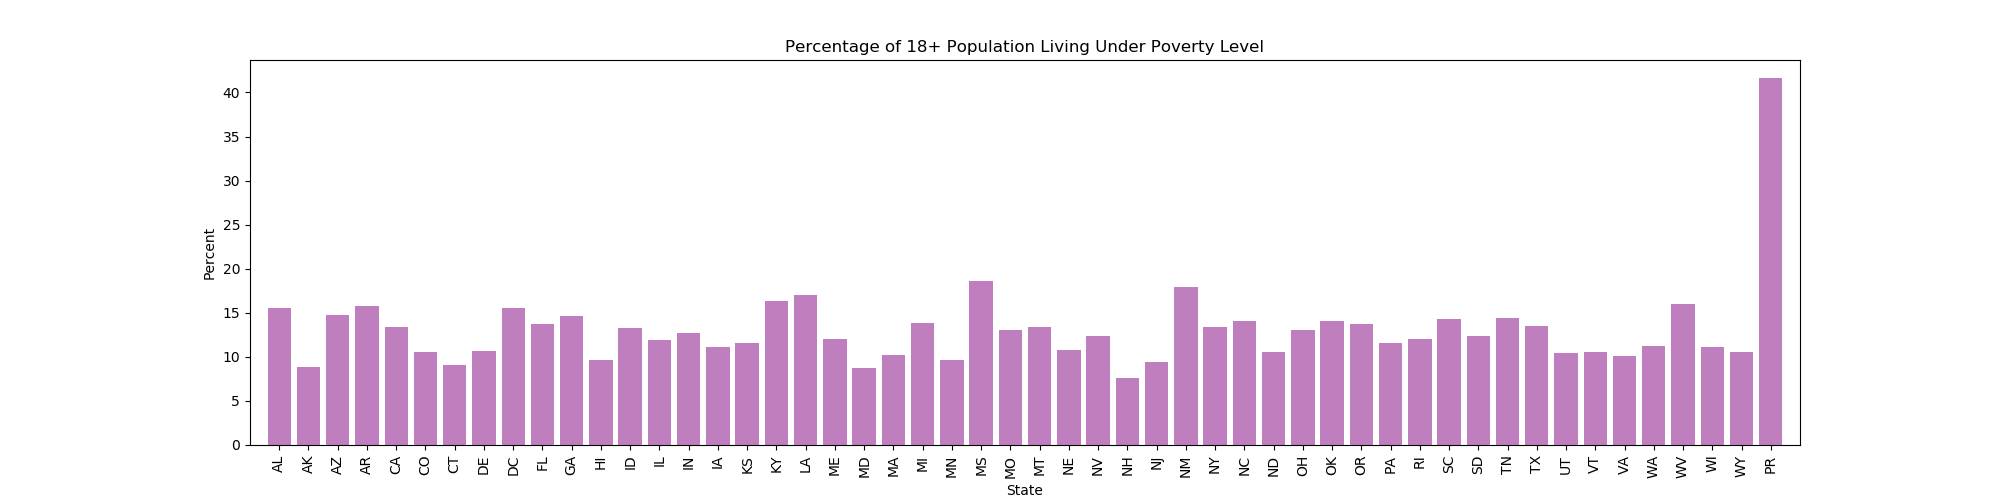

In [28]:


states = o_econ_df_s['state_abbr']
pop_pov = o_econ_df_s['Pct_Pov_pop_all18']
x_axis = np.arange(len(states))

plt.figure(figsize=(20, 5))
plt.bar(x_axis, pop_pov, color='purple', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="vertical")

plt.xlim(-1, len(x_axis))
#plt.ylim(0, max(pop_pov)+5)

plt.title("Percentage of 18+ Population Living Under Poverty Level")
plt.xlabel("State")
plt.ylabel("Percent")

plt.savefig("Images/Pct_Poverty_2017.png")

In [ ]:
path_age_o = "output_data/offender-ageDF.csv"
o_age_df = pd.read_csv(path_age_o, encoding="ISO-8859-1")

o_age_df_2017 = o_age_df.loc[o_age_df['Year']==2017, :]


#Don't care about 0-9 range
del o_age_df_2017['0-9']

#Add a new column to the df that calculates the average for each age between 10-19
o_age_df_2017['16-19'] = o_age_df_2017['10-19']/10

#Add more new columns to hold the values for all ranges 16+ and 18+ 
o_age_df_2017['16_plus'] = o_age_df_2017['20-29'] + o_age_df_2017['30-39']+ o_age_df_2017['40-49'] + o_age_df_2017['50-59'] + o_age_df_2017['60-69'] + o_age_df_2017['70-79'] + o_age_df_2017['80-89'] + o_age_df_2017['90-99'] + (o_age_df_2017['16-19']*4)
o_age_df_2017['18_plus'] = o_age_df_2017['20-29'] + o_age_df_2017['30-39']+ o_age_df_2017['40-49'] + o_age_df_2017['50-59'] + o_age_df_2017['60-69'] + o_age_df_2017['70-79'] + o_age_df_2017['80-89'] + o_age_df_2017['90-99'] + (o_age_df_2017['16-19']*2)

o_age_df_2017.head()

In [29]:
path_sex_o = "output_data/offender-sexDF.csv"
o_sex_df = pd.read_csv(path_sex_o, encoding="ISO-8859-1")

o_sex_df_2017 = o_sex_df.loc[o_sex_df['Year']==2017, :]

del o_sex_df_2017['Unknown']
del o_sex_df_2017["Unkown"]

In [30]:
o_sex_df_2017.sort_values(by=['Male Count'], ascending=False)

,Unnamed: 0,State,Year,Female Count,Male Count
516,516,TN,2017,67,511
292,292,MI,2017,96,469
406,406,OH,2017,62,446
477,477,SC,2017,84,420
586,586,VA,2017,68,407
63,63,CO,2017,34,229
537,537,TX,2017,26,227
28,28,AR,2017,32,211
633,633,WI,2017,33,206
218,218,KY,2017,45,198


<IPython.core.display.Javascript object>


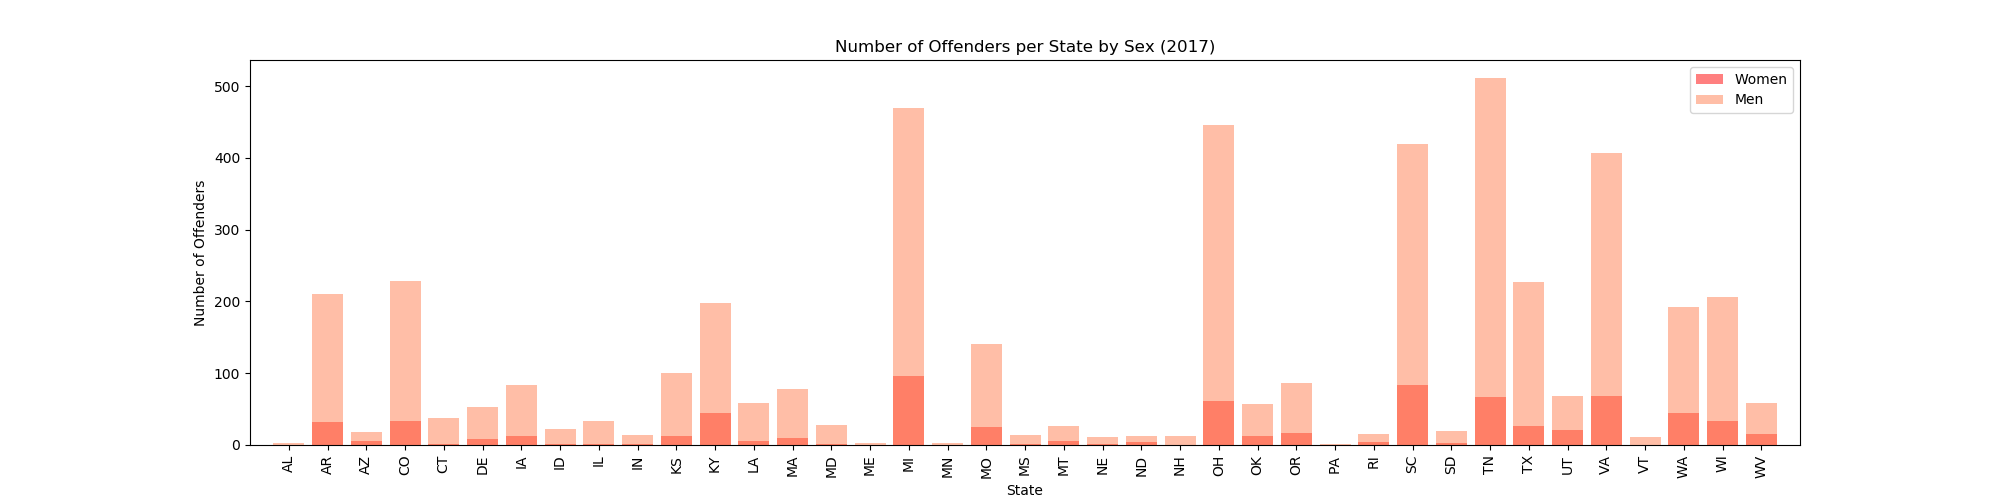

In [31]:
#OFFENDERS PER STATE BY SEX
states = o_sex_df_2017['State']
o_F = o_sex_df_2017['Female Count']
o_M = o_sex_df_2017['Male Count']
x_axis = np.arange(len(states))

plt.figure(figsize=(20, 5))
women = plt.bar(x_axis, o_F, color='red', alpha=0.5, align='center')
men = plt.bar(x_axis, o_M, color='coral', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="vertical")

plt.xlim(-1, len(x_axis))
#plt.ylim(0, max(med_earn_M)+5000)

plt.title("Number of Offenders per State by Sex (2017)")
plt.xlabel("State")
plt.ylabel("Number of Offenders")

plt.legend((women[0], men[0]), ('Women', 'Men'))

plt.savefig("Images/Male_and_Female_Offenders_by_State_2017.png")

In [9]:
path_agencies = "output_data/agency_data.csv"
agencies = pd.read_csv(path_agencies, encoding="ISO-8859-1")

merge = pd.merge(agencies, sex_df_2017, on=['State'])
merge

NameError: name 'sex_df_2017' is not defined

In [32]:
state = merge['State']
v_F = merge['Female Count']
v_M = merge['Male Count']
agency = merge['Pct Active']


NameError: name 'merge' is not defined

In [33]:

plt.scatter(state, v_F, marker="o", facecolors="coral", edgecolors="black", alpha=0.75, s=agency*5, label='Women') 
plt.scatter(state, v_M, marker="o", facecolors="gold", edgecolors="black", alpha=1, s=agency*5, label='Men') 


#Incorporate the other graph properties
plt.grid()

plt.xlabel("X Axis)")
plt.ylabel("Y Axis")
plt.title("Title")

#Create a legend
#legend = plt.legend(fontsize = 8, title= "Title", loc="best") 
#legend.legendHandles[0]._sizes = [35]
#legend.legendHandles[1]._sizes = [35]
#legend.legendHandles[2]._sizes = [35]

#Incorporate a text label regarding circle size
#plt.text(42,35,"Note: \nCircle size correlates with number of actively reporting agencies", fontsize = 10)

#Save Figure
#plt.savefig("Images/PyberRideSharingData.png", bbox_inches="tight")

#Show plot
plt.show()

NameError: name 'state' is not defined